In [93]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime
from datetime import timedelta
import pandas as pd

In [99]:
time_range = 5

# Get today's date
end_date = datetime.datetime.today()

# Calculate the start date (5 years earlier)
start_date = end_date - timedelta(days=time_range*365)

# Format dates as strings
end_date_str = end_date.strftime('%Y-%m-%d')
start_date_str = start_date.strftime('%Y-%m-%d')

# Define the ticker symbol
symbol = ["KAI"]

# Download the data
data = yf.download(symbol, start=start_date_str, end=end_date_str)

print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2019-07-22   87.230003   88.070000   86.629997   87.019997   84.220078   71200
2019-07-23   87.370003   88.610001   87.269997   87.900002   85.071754   37600
2019-07-24   87.809998   89.209999   87.709999   89.209999   86.339607   56900
2019-07-25   89.120003   89.370003   86.839996   87.040001   84.239418   51100
2019-07-26   87.190002   87.400002   85.839996   86.760002   83.968437   86100
...                ...         ...         ...         ...         ...     ...
2024-07-12  319.790009  325.179993  318.369995  324.399994  324.399994   91900
2024-07-15  325.429993  337.440002  325.429993  329.200012  329.200012  100500
2024-07-16  332.000000  342.369995  331.440002  341.279999  341.279999   90800
2024-07-17  337.709991  343.399994  336.519989  339.459991  339.459991  115700
2024-07-18  336.170013  342.859985  333.070007  333.

In [100]:
# Calculate the volume change
volume = data["Volume"]
volume_change = volume.pct_change()

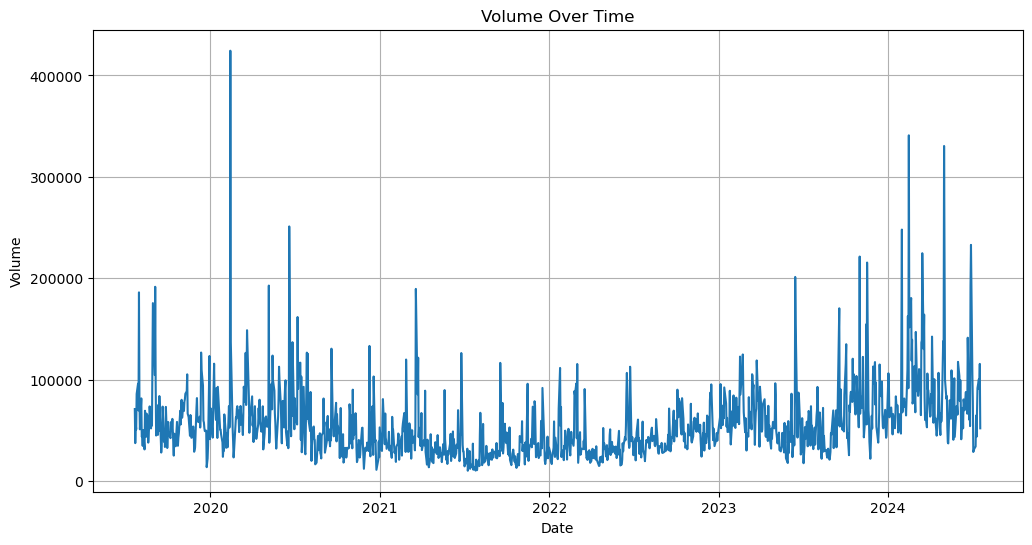

In [101]:
# Plot the volume change
plt.figure(figsize=(12, 6))
plt.plot(volume)



plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

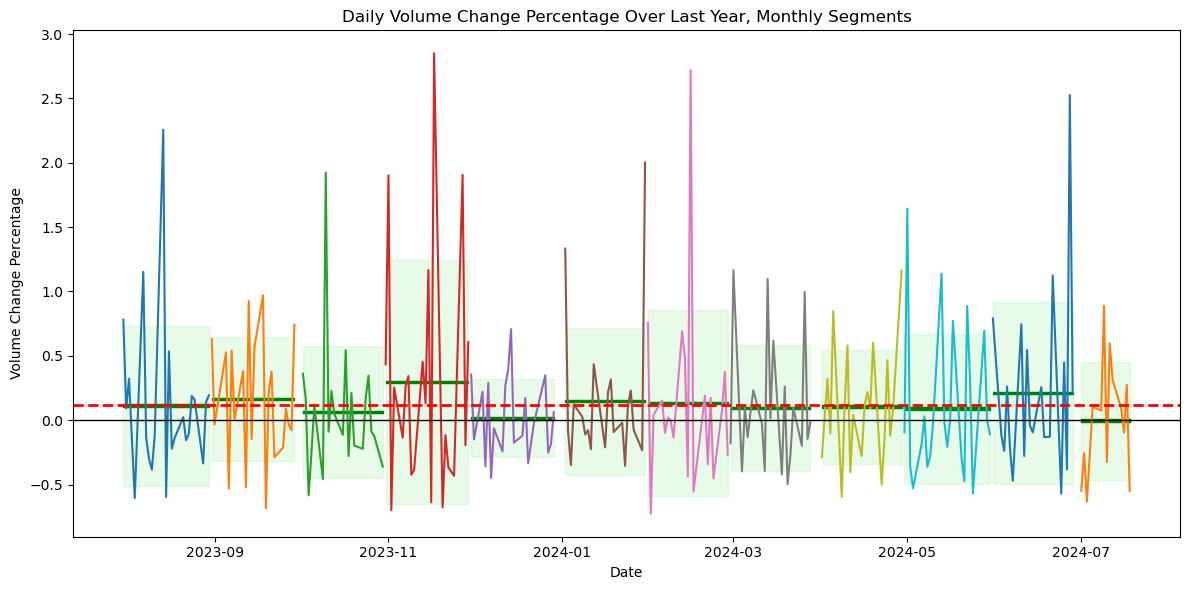

In [102]:
# Resample to monthly frequency for plotting the last year's data
volume_change_last_year = volume_change.loc[end_date - timedelta(days=365):]

# Calculate average volume change over the last year
average_volume_change = volume_change_last_year.mean()

# Plotting all months on a single plot
plt.figure(figsize=(12, 6))

# Iterate through each month
for i in range(len(volume_change_last_year.resample('M'))):
    # Subset data for the current month
    start_month = volume_change_last_year.resample('M').mean().index[i]
    if i == len(volume_change_last_year.resample('M')) - 1:
        end_month = end_date
    else:
        end_month = volume_change_last_year.resample('M').mean().index[i + 1] - timedelta(days=1)
    
    volume_change_month = volume_change_last_year.loc[start_month:end_month]

    # Mean and standard deviation for the current month
    mean_volume_change = volume_change_month.mean()
    std_volume_change = volume_change_month.std()
    
    # Upper and lower borders
    upper_border = mean_volume_change + std_volume_change
    lower_border = mean_volume_change - std_volume_change
    
    # Plot volume change for the current month
    plt.plot(volume_change_month.index, volume_change_month, label=start_month.strftime('%b %Y'))
    
    # Fill area between mean ± std dev for the current month
    plt.fill_between(volume_change_month.index, lower_border, upper_border, alpha=0.2, color='lightgreen')

    # Highlight mean line with a stronger color
    plt.fill_between(volume_change_month.index, mean_volume_change - 0.01, mean_volume_change + 0.01, alpha=1, color='green')
    
plt.axhline(y=average_volume_change, color='red', linestyle='--', linewidth=2, label=f'Average: {average_volume_change:.4f}')

# Plot the zero line
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Title and labels
plt.title('Daily Volume Change Percentage Over Last Year, Monthly Segments')
plt.xlabel('Date')
plt.ylabel('Volume Change Percentage')
plt.grid(False)
plt.tight_layout()
plt.show()

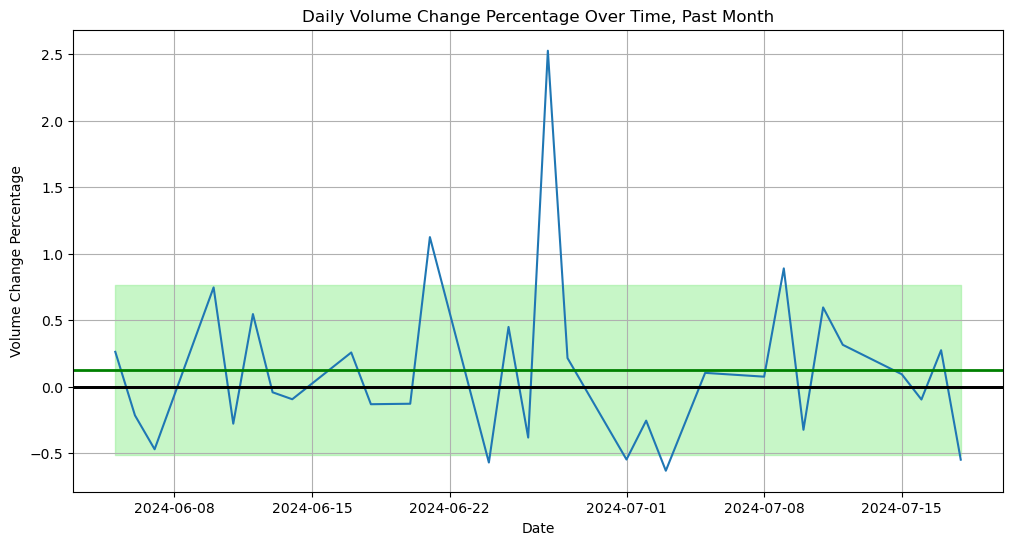

Today the volume is up: -54.879999999999995 %, from yesterday


In [103]:

# Plot the volume change of past month
volume_change_month = volume_change.iloc[-30:]

plt.figure(figsize=(12, 6))
plt.plot(volume_change_month)

hline_value = 0  # x-axis
plt.axhline(y=hline_value, color='black', linestyle='-', linewidth=2)

# Mean and standard deviation
mean_volume_change = volume_change_month.mean()
std_volume_change = volume_change_month.std()

# Upper and lower borders
upper_border = mean_volume_change + std_volume_change
lower_border = mean_volume_change - std_volume_change

# Plot the mean line
plt.axhline(y=mean_volume_change, color='green', linestyle='-', linewidth=2, label='Mean')

# Plot the zero line
plt.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Zero')

# Fill the area between mean ± std dev
plt.fill_between(volume_change_month.index, lower_border, upper_border, color='lightgreen', alpha=0.5, label='Mean ± 1 Std Dev')

plt.title('Daily Volume Change Percentage Over Time, Past Month')
plt.xlabel('Date')
plt.ylabel('Volume Change Percentage')
plt.grid(True)
plt.show()

print("Today the volume is up:",round(volume_change.iloc[-1],4)*100,"%, from yesterday")